 # Situación problemática
 Hagan una pequeña investigación del tema para tener una idea de qué buscar en un análisis exploratorio. En el caso de los problemas médicos, describan la enfermedad a detectar, los síntomas y como se diagnostica (especialmente diagnóstico basado en imágenes). Esto les va a servir para entender cual es el patrón que deben reconocer los algoritmos.

Descripción de la complejidad del ser humano
La medicina, la cual según Oxford es la ciencia encargada de estudiar las enfermedades que afectan al ser humano, a lo largo de los años y de la mano de la tecnología ha logrado encontrar tratamiento y manera de prevenir una variedad de enfermedades, desde el desarrollo de la vacuna contra la polio hasta la identificación de unidades funcionales en diferentes órganos.
Descripción de los TFU´s y la descripción de cada uno de los órganos.

# Problema científico
Se enuncia el problema científico que se desprende de la situación planteada. Se comprende bien cuál es el problema.

# Objetivos
 Se plantean los objetivos a cumplir para dar solución al problema
planteado. Se enuncian, al menos, un objetivo general y 2 específicos. Los objetivos deben ser medibles y alcanzables durante la investigación

In [2]:
# libraries
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
import os
import numpy as np

In [39]:
plt.rcParams['figure.figsize']=(25,10)
images_dir = 'train_images/'
train_images = os.listdir(images_dir)

In [76]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
'''
    img: numpy array, 1 → mask, 0 → background
    Returns run length as string formatted
'''
def mask2rle(img):

    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

'''
    rle: run-length as string formatted (start length)
    shape: (height,width) of array to return
    Returns numpy array, 1 → mask, 0 → background
'''
def rle2mask(rle, shape):
    s = rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

# Descripción de los datos
Se describen los datos, tanto las variables y observaciones como las operaciones de limpieza que se realizaron si hubo necesidad de hacerlas.

In [3]:
# carga de los datos
data = pd.read_csv('train.csv', index_col='id')
data.sort_index()

,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
id,,,,,,,,,
62,kidney,HPA,3000,3000,0.4,4,4382055 23 4385050 34 4388048 44 4391045 57 43...,59.0,Male
127,lung,HPA,3000,3000,0.4,4,4237495 6 4240494 9 4243491 14 4246490 17 4249...,21.0,Male
144,spleen,HPA,3000,3000,0.4,4,1273039 14 1276037 18 1279035 23 1282034 26 12...,50.0,Female
164,kidney,HPA,3000,3000,0.4,4,1539720 16 1542718 22 1545717 25 1548716 33 15...,61.0,Male
203,largeintestine,HPA,3000,3000,0.4,4,610617 10 613607 28 616602 38 619600 43 622597...,84.0,Female
...,...,...,...,...,...,...,...,...,...
32231,spleen,HPA,3000,3000,0.4,4,1399958 26 1402957 29 1405956 32 1408947 48 14...,72.0,Male
32325,kidney,HPA,3000,3000,0.4,4,1405200 12 1408197 18 1411188 66 1414184 81 14...,56.0,Female
32412,prostate,HPA,3000,3000,0.4,4,2888331 67 2891325 76 2894320 84 2897303 104 2...,48.0,Male


<Figure size 1800x720 with 0 Axes>

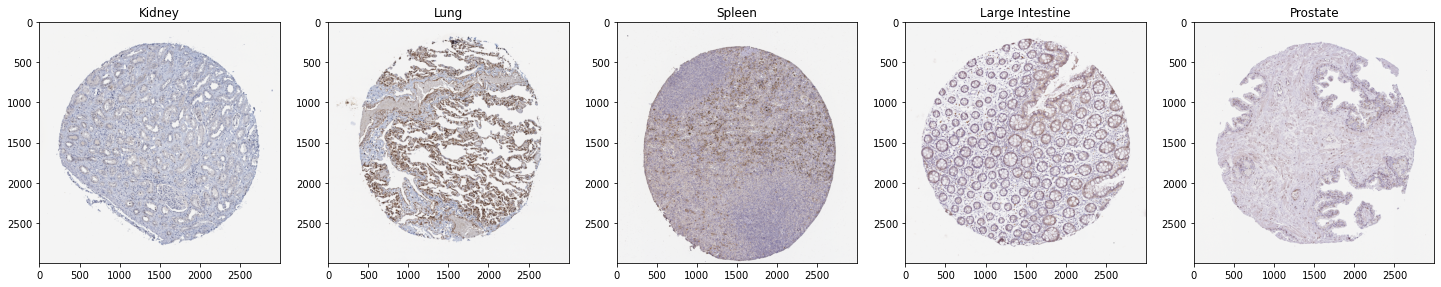

In [40]:
# preview of the organs images
plt.figure()

f, ax = plt.subplots(1,5)
imgs = ['62.tiff', '127.tiff', '144.tiff', '203.tiff', '435.tiff']
organs = ['Kidney', 'Lung', 'Spleen', 'Large Intestine', 'Prostate']
cont = 0
for img in imgs:
    ax[cont].imshow(io.imread(images_dir + img))
    ax[cont].set_title(organs[cont])
    cont += 1


El conjunto de datos para la elaboración de análisis de los tejidos funcionales de los órganos fue obtenido mediante la página de Kaggle de la competencia *Hacking the Human Body*. Los datos proporcionados constan de 351 observaciones (con sus respectivas imágenes para el análisis, de las cuales se puede observar una previsualización en la imagen anterior) y 10 variables, en las cuales se describe tanto información de las imágenes como el sexo y la edad del donador. Los organos provistos para el análisis son: riñón, pulmón, bazo, intestino grueso y próstata.

In [24]:
data.describe()

,img_height,img_width,pixel_size,tissue_thickness,age
count,351.000000,351.000000,3.510000e+02,351.0,351.000000
mean,2978.364672,2978.364672,4.000000e-01,4.0,60.364672
std,90.962085,90.962085,1.111808e-16,0.0,16.013327
min,2308.000000,2308.000000,4.000000e-01,4.0,21.000000
25%,3000.000000,3000.000000,4.000000e-01,4.0,55.000000
50%,3000.000000,3000.000000,4.000000e-01,4.0,60.000000
75%,3000.000000,3000.000000,4.000000e-01,4.0,73.000000
max,3070.000000,3070.000000,4.000000e-01,4.0,84.000000


Al realizar un análisis estadístico general de las variables en el conjunto de datos se puede notar que el tamaño promedio de las imágenes es aproximadamente 2978 pixeles, con un tamaño de pixel promedio de 0.4 y una edad promedio de donadores de 60 años.

## Normalización de imágenes
La normalización es un aspecto clave al momento de utilizar algoritmos de aprendizaje de máquina. Al igual que al trabajar con datos que no son imágenes es necesaria la normalización para garantizar que los algoritmos aprendan de manera equivalente todas las características delos datos, al momento de trabajar con imágenes es necesaria la normalización para garantizar que los pixeles se encuentren distribuidos de manera similar, así como también para hacer la convergencia del algoritmo mucho más rápida al momento de entrenar los modelos. Debido a que las imágenes de los órganos proporcionadas se encuentran fuera de un rango de 0 a 1 es necesario hacer normalización de las mismas.

In [17]:
def normalize_images(image):
    # Normalize all the pixel values of the images to be from 0 to 1
    normalized_img = image  / image.max()
    return normalized_img

1.0

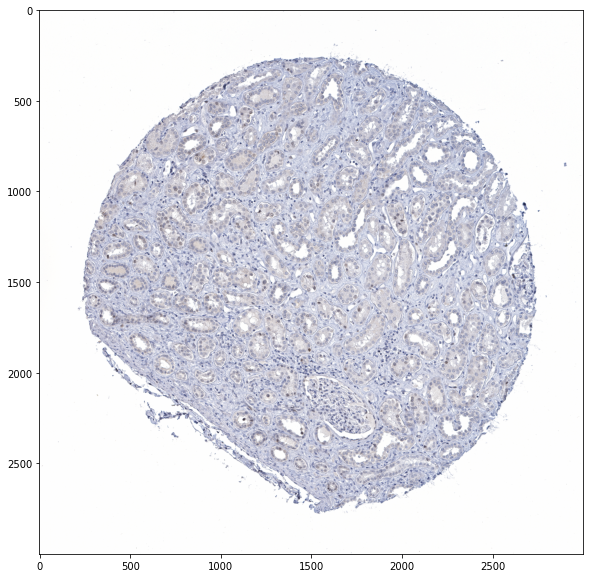

In [41]:
img = io.imread(images_dir + imgs[0])
norm_img = normalize_images(img)
plt.imshow(norm_img)
norm_img.max()

In [42]:
for img in train_images:
    print(img)

10044.tiff
10274.tiff
10392.tiff
10488.tiff
10610.tiff
10611.tiff
10651.tiff
10666.tiff
10703.tiff
10892.tiff
10912.tiff
10971.tiff
10992.tiff
11064.tiff
1123.tiff
11448.tiff
11497.tiff
1157.tiff
11629.tiff
11645.tiff
11662.tiff
1168.tiff
1184.tiff
11890.tiff
12026.tiff
12174.tiff
1220.tiff
12233.tiff
12244.tiff
1229.tiff
12452.tiff
12466.tiff
12471.tiff
12476.tiff
12483.tiff
127.tiff
12784.tiff
12827.tiff
13034.tiff
13189.tiff
13260.tiff
13396.tiff
13483.tiff
13507.tiff
13942.tiff
14183.tiff
14388.tiff
14396.tiff
144.tiff
14407.tiff
14674.tiff
14756.tiff
1500.tiff
15005.tiff
15067.tiff
15124.tiff
15192.tiff
15329.tiff
15499.tiff
15551.tiff
15706.tiff
15732.tiff
15787.tiff
15842.tiff
15860.tiff
16149.tiff
16163.tiff
16214.tiff
16216.tiff
16362.tiff
164.tiff
16564.tiff
16609.tiff
16659.tiff
16711.tiff
16728.tiff
16890.tiff
1690.tiff
17126.tiff
17143.tiff
17187.tiff
1731.tiff
17422.tiff
17455.tiff
17828.tiff
18121.tiff
18401.tiff
18422.tiff
18426.tiff
18445.tiff
18449.tiff
1850.tiff
1877

# Análisis exploratorio
Descripción de cuántas variables y observaciones hay disponibles, así como el tipo de cada una de las variables

Dentro del conjunto de datos se tienen 10 variables. Estas se pueden clasificar como:

**Cuantitativas**
- img_height: describe la altura de la imagen en pixeles
- img_width: describe el ancho de la imagen en pixeles
- pixel_size: define el tamaño del pixel de la imagen
- tissue_thickness:
- rle: formato de puntos que definen los límites de las máscaras poligonales en las cuales se encuentran unidades de tejido funcional
- edad: define la edad del donador

**Cualitativas**
- organ: describe el órgano asociado a la observación
- sex: define el sexo del donador
- data_source: define el proveedor de la imagen, es decir de dónde se obtuvo

## Estudio de las variables
Uso de estadística descriptiva, gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos. Elaboración de gráficos de barra, tabla de frecuencias y proporciones.

Como bien se ha descrito anteriormente, el objetivo del análisis de las imágenes de órganos, es el poder encontrar los límites en los cuales se encuentran unidades de tejido funcional. Para el aprendizaje de los modelos en el conjunto de entrenamiento se provee una lista de límites de la máscara de los polígonos en las áreas que se encuentran dichos tejidos. A continuación se muestran ciertos órganos con sus respectivas unidades de tejido funcional.

<Figure size 1080x1800 with 0 Axes>

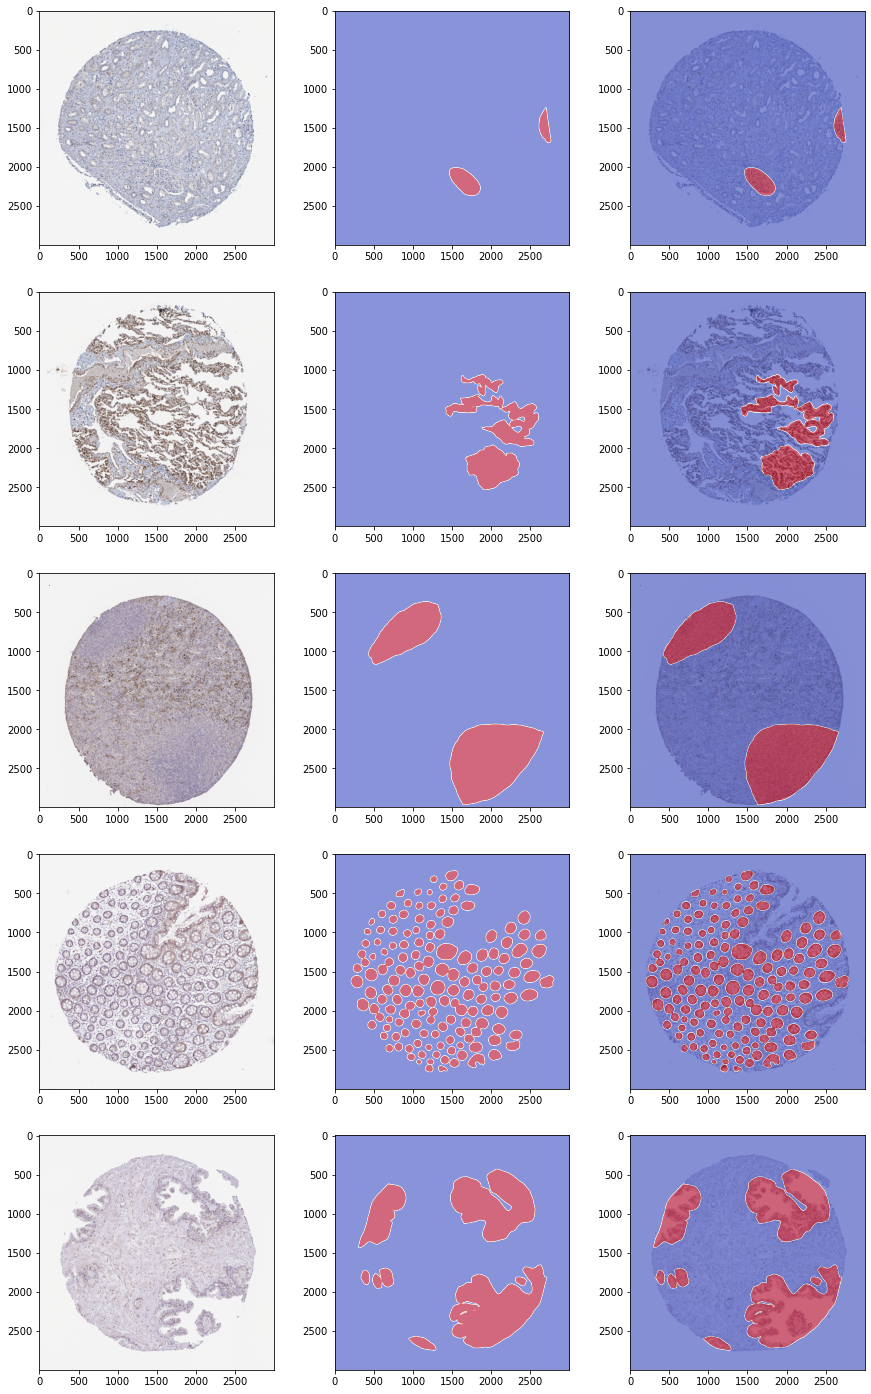

In [79]:
# preview of the organs images
plt.rcParams['figure.figsize']=(15, 25)
plt.figure()

f, ax = plt.subplots(5,3)
column = 0
for row in range(5):
        # ax[row].set_title(organs[row])
        img = io.imread(images_dir + imgs[row])
        ax[row][0].imshow(img)
        img_id = int(imgs[row].split('.')[0])
        rle = data.loc[img_id,'rle']
        mask = rle2mask(rle, img.shape[:2])
        ax[row][1].imshow(mask, cmap='coolwarm', alpha=0.6)
        ax[row][2].imshow(img)
        ax[row][2].imshow(mask, cmap='coolwarm', alpha=0.6)


## Correlación entre variables
Analizan las correlaciones entre las variables, tratan de explicar los datos atípicos (outliers) y toman decisiones acertadas ante la presencia de valores faltantes. Crucen las variables que consideren son las más importantes para hallar los elementos clave que puedan llevar a comprender lo que está causando el problema encontrado.

# Hallazgos y conclusiones
Conclusiones con los hallazgos encontrados durante el análisis exploratorio.